Baixe os dados em https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.contrib.rnn import BasicRNNCell

## Usando Demanda Anterior Para Prever Demanda Futura

In [2]:
bike_data = pd.read_csv('/Users/matheusfacure/Downloads/Bike-Sharing-Dataset/hour.csv')
bike_data.sort_values(["dteday", "hr"], inplace=True)
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
demanda = bike_data[['cnt']]
n_steps = 20

for time_step in range(1, n_steps+1):
    demanda['cnt'+str(time_step)] = demanda[['cnt']].shift(-time_step).values

demanda.dropna(inplace=True)
demanda.head()

/Users/matheusfacure/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,cnt,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,cnt7,cnt8,cnt9,...,cnt11,cnt12,cnt13,cnt14,cnt15,cnt16,cnt17,cnt18,cnt19,cnt20
0,16,40.0,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,...,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0
1,40,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,...,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0
2,32,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,...,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0
3,13,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,...,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0
4,1,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,...,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0


In [4]:
# X
demanda.iloc[:, :n_steps]

,cnt,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,cnt7,cnt8,cnt9,cnt10,cnt11,cnt12,cnt13,cnt14,cnt15,cnt16,cnt17,cnt18,cnt19
0,16,40.0,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0
1,40,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0
2,32,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0
3,13,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0
4,1,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0
5,1,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0
6,2,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0
7,3,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0
8,8,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0,6.0
9,14,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0,6.0,3.0


In [5]:
# y
demanda.iloc[:, 1:]

,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,cnt7,cnt8,cnt9,cnt10,cnt11,cnt12,cnt13,cnt14,cnt15,cnt16,cnt17,cnt18,cnt19,cnt20
0,40.0,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0
1,32.0,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0
2,13.0,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0
3,1.0,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0
4,1.0,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0
5,2.0,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0
6,3.0,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0
7,8.0,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0,6.0
8,14.0,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0,6.0,3.0
9,36.0,56.0,84.0,94.0,106.0,110.0,93.0,67.0,35.0,37.0,36.0,34.0,28.0,39.0,17.0,17.0,9.0,6.0,3.0,2.0


In [6]:
X = demanda.iloc[:, :n_steps].values
X = np.reshape(X, (X.shape[0], n_steps, 1)) # add dimensão

y = demanda.iloc[:, 1:].values
y = np.reshape(y, (y.shape[0], n_steps, 1)) # add dimensão

print(X.shape, y.shape)

(17359, 20, 1) (17359, 20, 1)


In [7]:
demanda.shape

(17359, 21)

In [8]:
n_test = 500

X_train, X_test = X[:-n_test, :, :], X[-n_test:, :, :]
y_train, y_test = y[:-n_test, :, :], y[-n_test:, :, :]

In [9]:
shuffle_mask = np.arange(0, X_train.shape[0])
np.random.shuffle(shuffle_mask)

X_train = X_train[shuffle_mask]
y_train = y_train[shuffle_mask]

# Construção

In [10]:
n_inputs = 1
n_neurons = 64
n_outputs = 1
learning_rate = 0.001

graph = tf.Graph()
with graph.as_default():
    # placeholders
    tf_X = tf.placeholder(tf.float32, [None, n_steps, n_inputs], name='X')
    tf_y = tf.placeholder(tf.float32, [None, n_steps, n_outputs], name='y')
    
    with tf.name_scope('Recurent_Layer'):
        cell = BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
        outputs, Last_state = tf.nn.dynamic_rnn(cell, tf_X, dtype=tf.float32)
             
    with tf.name_scope('out_layer'):
        stacked_outputs = tf.reshape(outputs, [-1, n_neurons])
        stacked_outputs = tf.layers.dense(stacked_outputs, n_outputs, activation=None)
        net_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
    
    with tf.name_scope('train'):
        loss = tf.reduce_mean(tf.abs(net_outputs - tf_y)) # MAE
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    init = tf.global_variables_initializer()

In [11]:
n_iterations = 10000
batch_size = 64

with tf.Session(graph=graph) as sess:
    init.run()
    
    for step in range(n_iterations+1):
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        X_batch = X_train[offset:(offset + batch_size), :]
        y_batch = y_train[offset:(offset + batch_size)]
        
        sess.run(optimizer, feed_dict={tf_X: X_batch, tf_y: y_batch})
 
        if step % 2000 == 0:
            train_mae = loss.eval(feed_dict={tf_X: X_train, tf_y: y_train})
            print(step, "\tTrain MAE:", train_mae)
    
    test_mae = loss.eval(feed_dict={tf_X: X_test, tf_y: y_test})
    print(step, "\tTest MAE:", test_mae)

    y_pred = sess.run(net_outputs, feed_dict={tf_X: X_test})

0 	Train MAE: 177.185
2000 	Train MAE: 33.6416
4000 	Train MAE: 31.0489
6000 	Train MAE: 29.9043
8000 	Train MAE: 29.1643
10000 	Train MAE: 28.7727
10000 	Test MAE: 24.8253


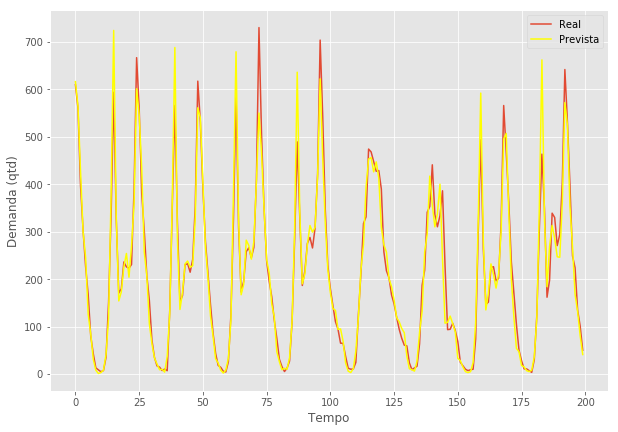

In [12]:
sample = 10
n = 200 

plt.style.use("ggplot")
f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_pred[:n,sample,0], label="Real")
plt.plot(range(n), y_test[:n,sample,0], color="yellow", label="Prevista")
plt.ylabel("Demanda (qtd)")
plt.xlabel("Tempo")
plt.legend(loc="best")
f.savefig("rnn_demanda1.png")
plt.show()

In [13]:
from sklearn.metrics import r2_score
r2_score(y_pred=y_pred.reshape(-1,1), y_true=y_test.reshape(-1,1))

0.91086935227479937

In [14]:
# Modelo ingênuo
y_pred = bike_data['cnt'].shift(-1)[:-1]
y_true = bike_data['cnt'][:-1]

r2_score(y_true, y_pred)

0.68762442725046546

## Usando mais variáveis

In [15]:
features = ['cnt','temp','hum']
demanda = bike_data[features]
n_steps = 20

for var_col in features:
    for time_step in range(1, n_steps+1):
        demanda[var_col+str(time_step)] = demanda[[var_col]].shift(-time_step).values

demanda.dropna(inplace=True)
demanda.head()

/Users/matheusfacure/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,cnt,temp,hum,cnt1,cnt2,cnt3,cnt4,cnt5,cnt6,cnt7,...,hum11,hum12,hum13,hum14,hum15,hum16,hum17,hum18,hum19,hum20
0,16,0.24,0.81,40.0,32.0,13.0,1.0,1.0,2.0,3.0,...,0.81,0.77,0.72,0.72,0.77,0.82,0.82,0.88,0.88,0.87
1,40,0.22,0.80,32.0,13.0,1.0,1.0,2.0,3.0,8.0,...,0.77,0.72,0.72,0.77,0.82,0.82,0.88,0.88,0.87,0.87
2,32,0.22,0.80,13.0,1.0,1.0,2.0,3.0,8.0,14.0,...,0.72,0.72,0.77,0.82,0.82,0.88,0.88,0.87,0.87,0.94
3,13,0.24,0.75,1.0,1.0,2.0,3.0,8.0,14.0,36.0,...,0.72,0.77,0.82,0.82,0.88,0.88,0.87,0.87,0.94,0.88
4,1,0.24,0.75,1.0,2.0,3.0,8.0,14.0,36.0,56.0,...,0.77,0.82,0.82,0.88,0.88,0.87,0.87,0.94,0.88,0.88


In [16]:
n_var = len(features)
columns = list(filter(lambda col: not(col.endswith("%d" % n_steps)), demanda.columns))

X = demanda[columns].iloc[:, :(n_steps*n_var)].values
X = np.reshape(X, (X.shape[0], n_steps, n_var))

print(X.shape, y.shape)

(17359, 20, 3) (17359, 20, 1)


In [17]:
n_test = 500

X_train, X_test = X[:-n_test, :, :], X[-n_test:, :, :]
y_train, y_test = y[:-n_test, :, :], y[-n_test:, :, :]

In [18]:
shuffle_mask = np.arange(0, X_train.shape[0])
np.random.shuffle(shuffle_mask)

X_train = X_train[shuffle_mask]
y_train = y_train[shuffle_mask]

In [19]:
n_inputs = n_var
n_neurons = 64
n_outputs = 1
learning_rate = 0.001

graph = tf.Graph()
with graph.as_default():
    # placeholders
    tf_X = tf.placeholder(tf.float32, [None, n_steps, n_inputs], name='X')
    tf_y = tf.placeholder(tf.float32, [None, n_steps, n_outputs], name='y')
    
    with tf.name_scope('Recurent_Layer'):
        cell = BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
        outputs, Last_state = tf.nn.dynamic_rnn(cell, tf_X, dtype=tf.float32)
             
    with tf.name_scope('out_layer'):
        stacked_outputs = tf.reshape(outputs, [-1, n_neurons])
        stacked_outputs = tf.layers.dense(stacked_outputs, n_outputs, activation=None)
        net_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
    
    with tf.name_scope('train'):
        loss = tf.reduce_mean(tf.abs(net_outputs - tf_y)) # MAE
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    init = tf.global_variables_initializer()

In [20]:
n_iterations = 10000
batch_size = 64

with tf.Session(graph=graph) as sess:
    init.run()
    
    for step in range(n_iterations+1):
        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        X_batch = X_train[offset:(offset + batch_size), :]
        y_batch = y_train[offset:(offset + batch_size)]
        
        sess.run(optimizer, feed_dict={tf_X: X_batch, tf_y: y_batch})
 
        if step % 2000 == 0:
            train_mae = loss.eval(feed_dict={tf_X: X_train, tf_y: y_train})
            print(step, "\tTrain MAE:", train_mae)
    
    test_mae = loss.eval(feed_dict={tf_X: X_test, tf_y: y_test})
    print(step, "\tTest MAE:", test_mae)

    y_pred = sess.run(net_outputs, feed_dict={tf_X: X_test})

0 	Train MAE: 194.996
2000 	Train MAE: 20.707
4000 	Train MAE: 16.1996
6000 	Train MAE: 14.9824
8000 	Train MAE: 14.4306
10000 	Train MAE: 14.058
10000 	Test MAE: 11.5745


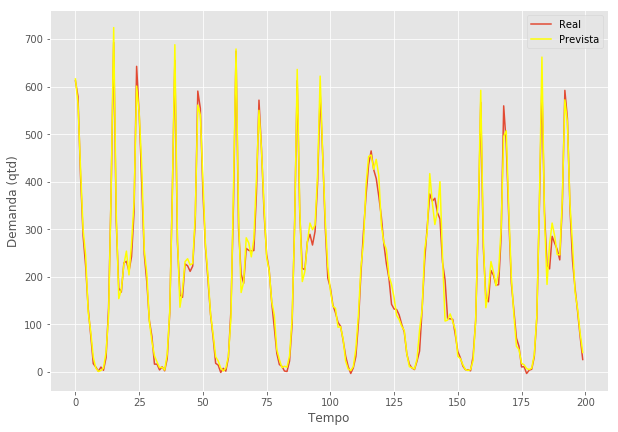

In [21]:
sample = 10
n = 200

f = plt.figure(figsize=(10,7))
plt.plot(range(n), y_pred[:n,sample,0], label="Real")
plt.plot(range(n), y_test[:n,sample,0], color="yellow", label="Prevista")
plt.ylabel("Demanda (qtd)")
plt.xlabel("Tempo")
plt.legend(loc="best")
f.savefig("rnn_demanda2.png")
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(y_pred=y_pred.reshape(-1,1), y_true=y_test.reshape(-1,1))

0.97107307006884347